# OpenCV

## 이미지 데이터 압축 해제

In [1]:
!unzip images.zip -d images

Archive:  images.zip
  inflating: images/cat.jpg          
  inflating: images/dog.jpg          
  inflating: images/fashion-mnist-sprite.png  
  inflating: images/gray_image.jpg   
  inflating: images/hand_writing_image.jpg  
  inflating: images/image_1.jpg      
  inflating: images/image_2.png      
보간법.png:  mismatching "local" filename (ы│┤ъ░Ды▓Х.png),
         continuing with "central" filename version
  inflating: images/보간법.png    


## 이미지 읽어서 살펴보기

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

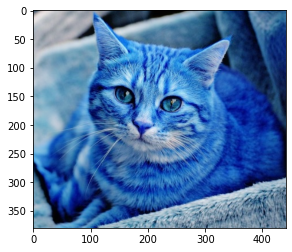

In [3]:
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
plt.imshow(image)

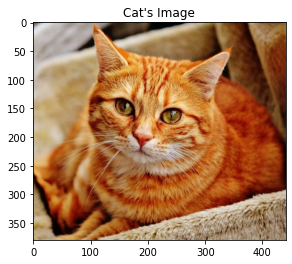

In [4]:
cat = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.title("Cat's Image")
plt.imshow(cat)

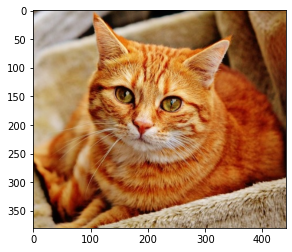

In [5]:
# delete class infomation
plt.imshow(cat);

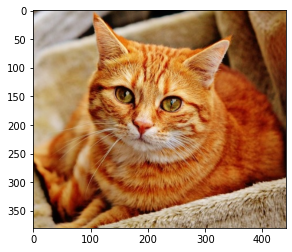

In [6]:
b, g, r = cv2.split(image) # image 파일을 b,g,r로 분리
image = cv2.merge([r,g,b]) # b,r 
plt.imshow(image);

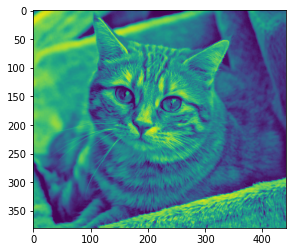

In [7]:
# Gray Scale Image
grayImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(grayImage);

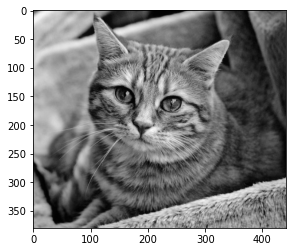

In [8]:
plt.imshow(grayImage, cmap=plt.get_cmap('gray'));

## 3. OpenCV 이미지 연산

In [10]:
# 픽셀수 및 이미지 크기 확인
image = cv2.imread('images/image_2.png')
image.shape, image.size

((720, 1280, 3), 2764800)

In [11]:
# 특정 범위 픽셀 변경
image = cv2.imread('images/cat.jpg', cv2.IMREAD_COLOR)
import time
start_time = time.time()
for i in range(0, 100):
  for j in range(0, 100):
    image[i, j] = [255, 255, 255]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.012501239776611328 seconds ---


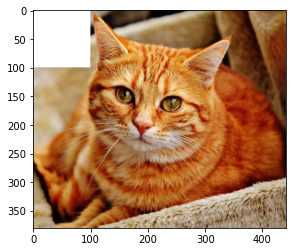

In [13]:
# cv2.imshow('Image', image)
basicImage = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(basicImage);

In [16]:
# Image 는 넘파이 객체이기 때문에 아래와 같이 사용하는 것도 가능하다.
start_time = time.time()
basicImage[0:100, 0:100] = [0, 0, 0]
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.0007212162017822266 seconds ---


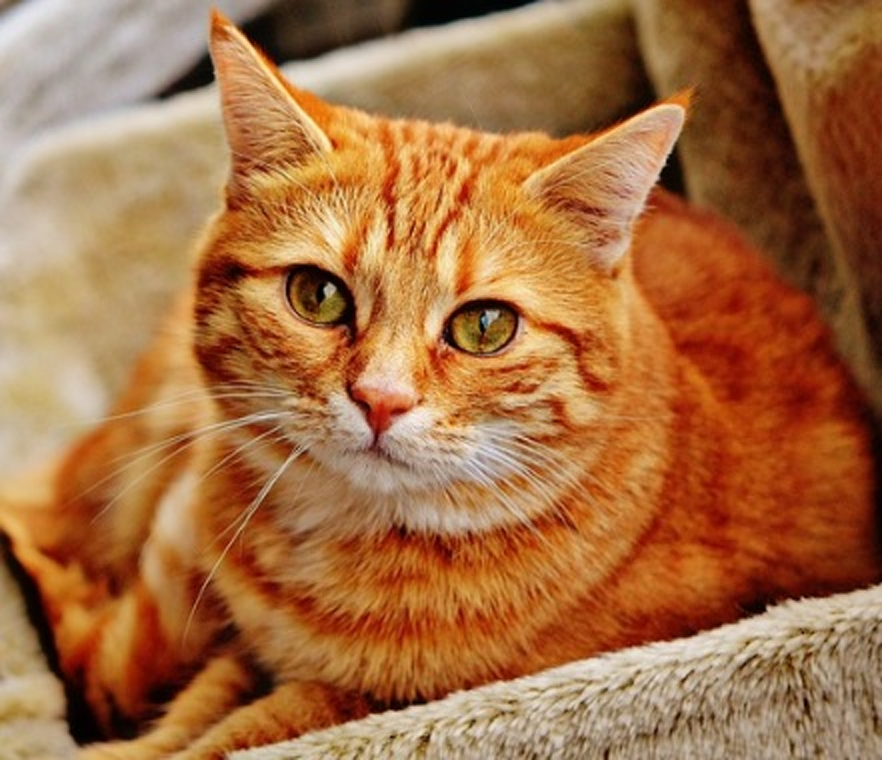

In [36]:
from google.colab.patches import cv2_imshow

# 이미지 크기 조절
image = cv2.imread('images/cat.jpg')
expand = cv2.resize(image, None, fx=2.0, fy=2.0, interpolation=cv2.INTER_CUBIC)

cv2_imshow(expand)

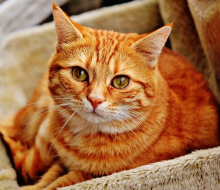

In [35]:
from google.colab.patches import cv2_imshow

# 이미지 크기 조절
image = cv2.imread('images/cat.jpg')

shrink = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)
cv2_imshow(shrink)

380 441


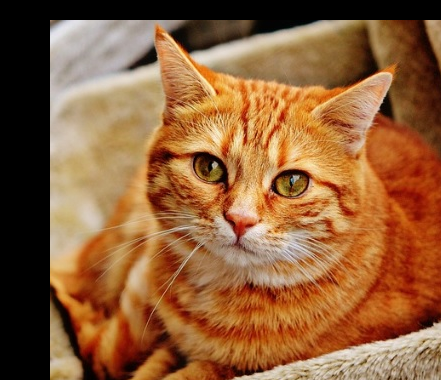

In [39]:
from google.colab.patches import cv2_imshow

# 행과 열 정보만 저장
image = cv2.imread('images/cat.jpg')
height, width = image.shape[:2]
print(height, width)

# 이미지 위치 변경
M = np.float32([[1, 0, 50], [0, 1, 20]])
dst = cv2.warpAffine(image, M, (width, height))
cv2_imshow(dst)

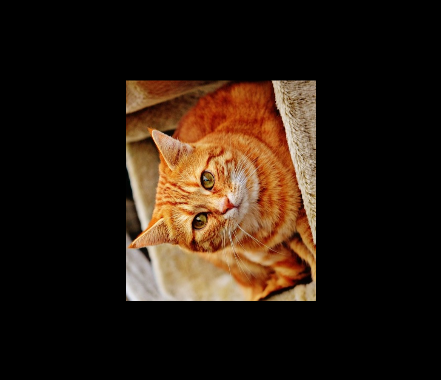

In [40]:
from google.colab.patches import cv2_imshow

# 행과 열 정보만 저장
image = cv2.imread('images/cat.jpg')
height, width = image.shape[:2]

# 이미지 회전
M = cv2.getRotationMatrix2D((width/2 , height/2), 90, 0.5)
dst = cv2.warpAffine(image, M, (width, height))
cv2_imshow(dst)

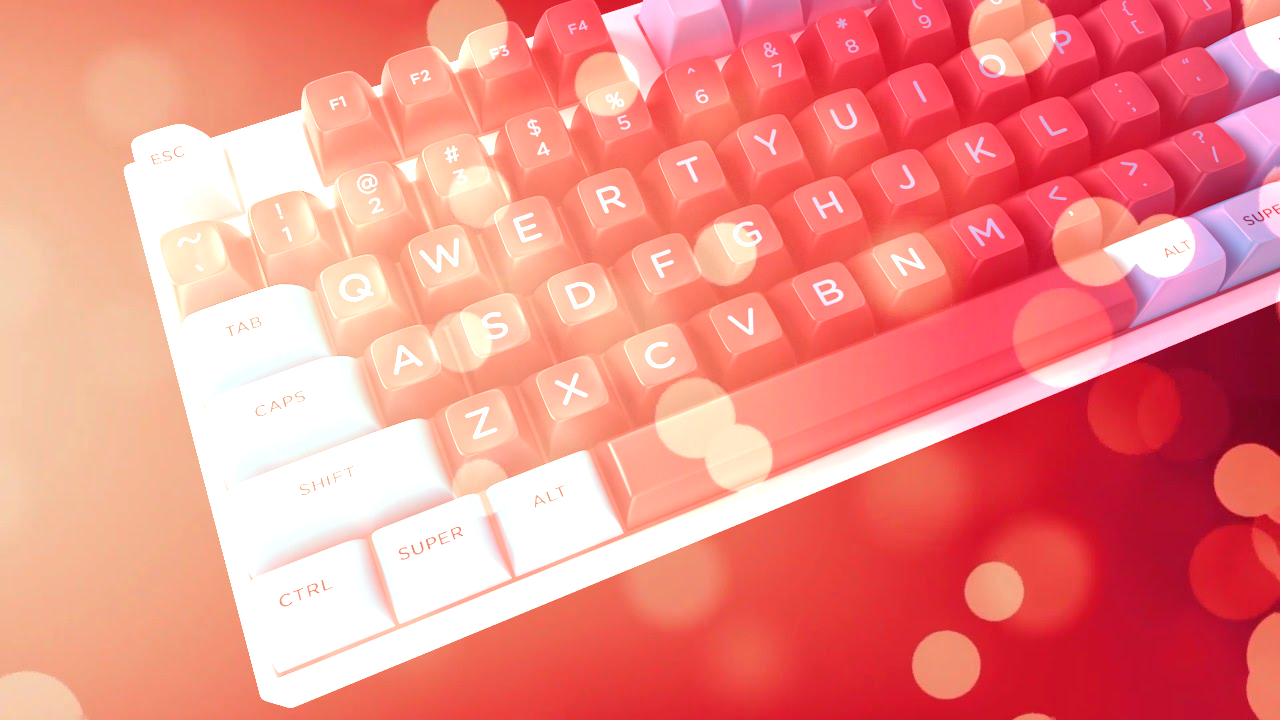

In [42]:
from google.colab.patches import cv2_imshow

# 행과 열 정보만 저장
image_1 = cv2.imread('images/image_1.jpg')
image_2 = cv2.imread('images/image_2.png')

# 이미지 합치기 (Saturation)
result = cv2.add(image_1, image_2)
cv2_imshow(result)

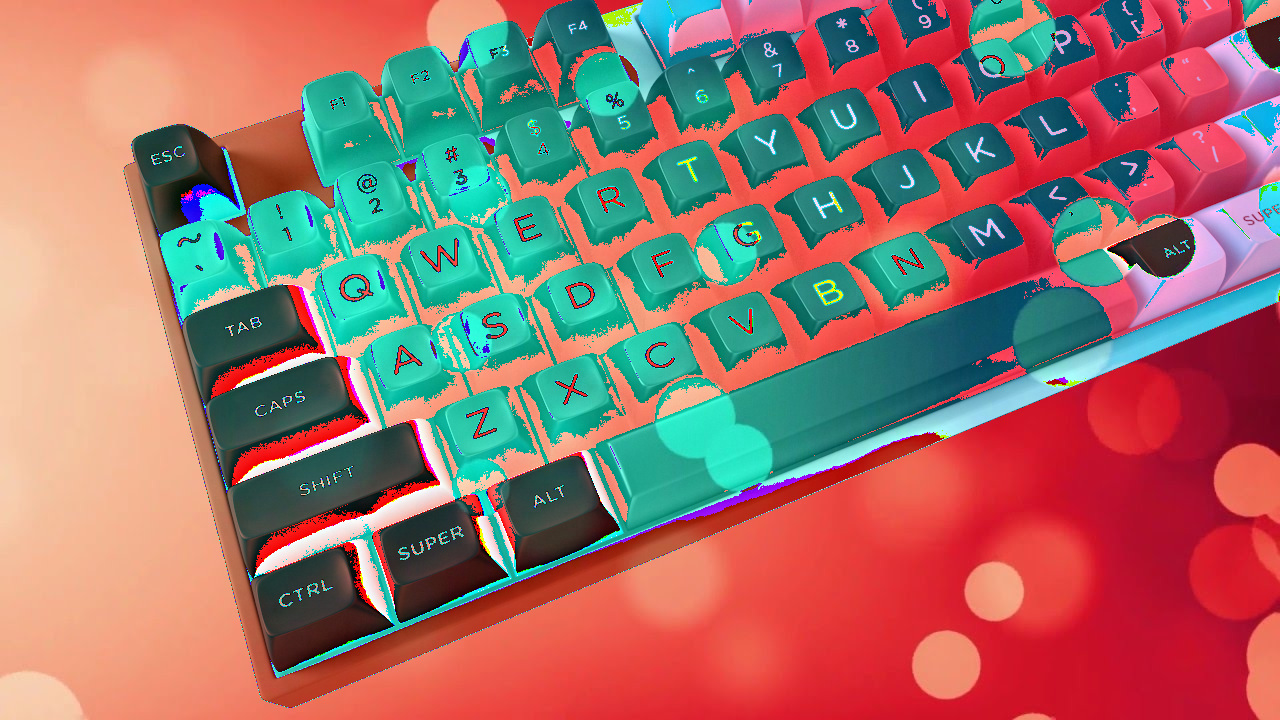

In [44]:
from google.colab.patches import cv2_imshow

# 행과 열 정보만 저장
image_1 = cv2.imread('images/image_1.jpg')
image_2 = cv2.imread('images/image_2.png')

# 이미지 합치기 (Modulo)
result2 = image_1 + image_2
cv2_imshow(result2)

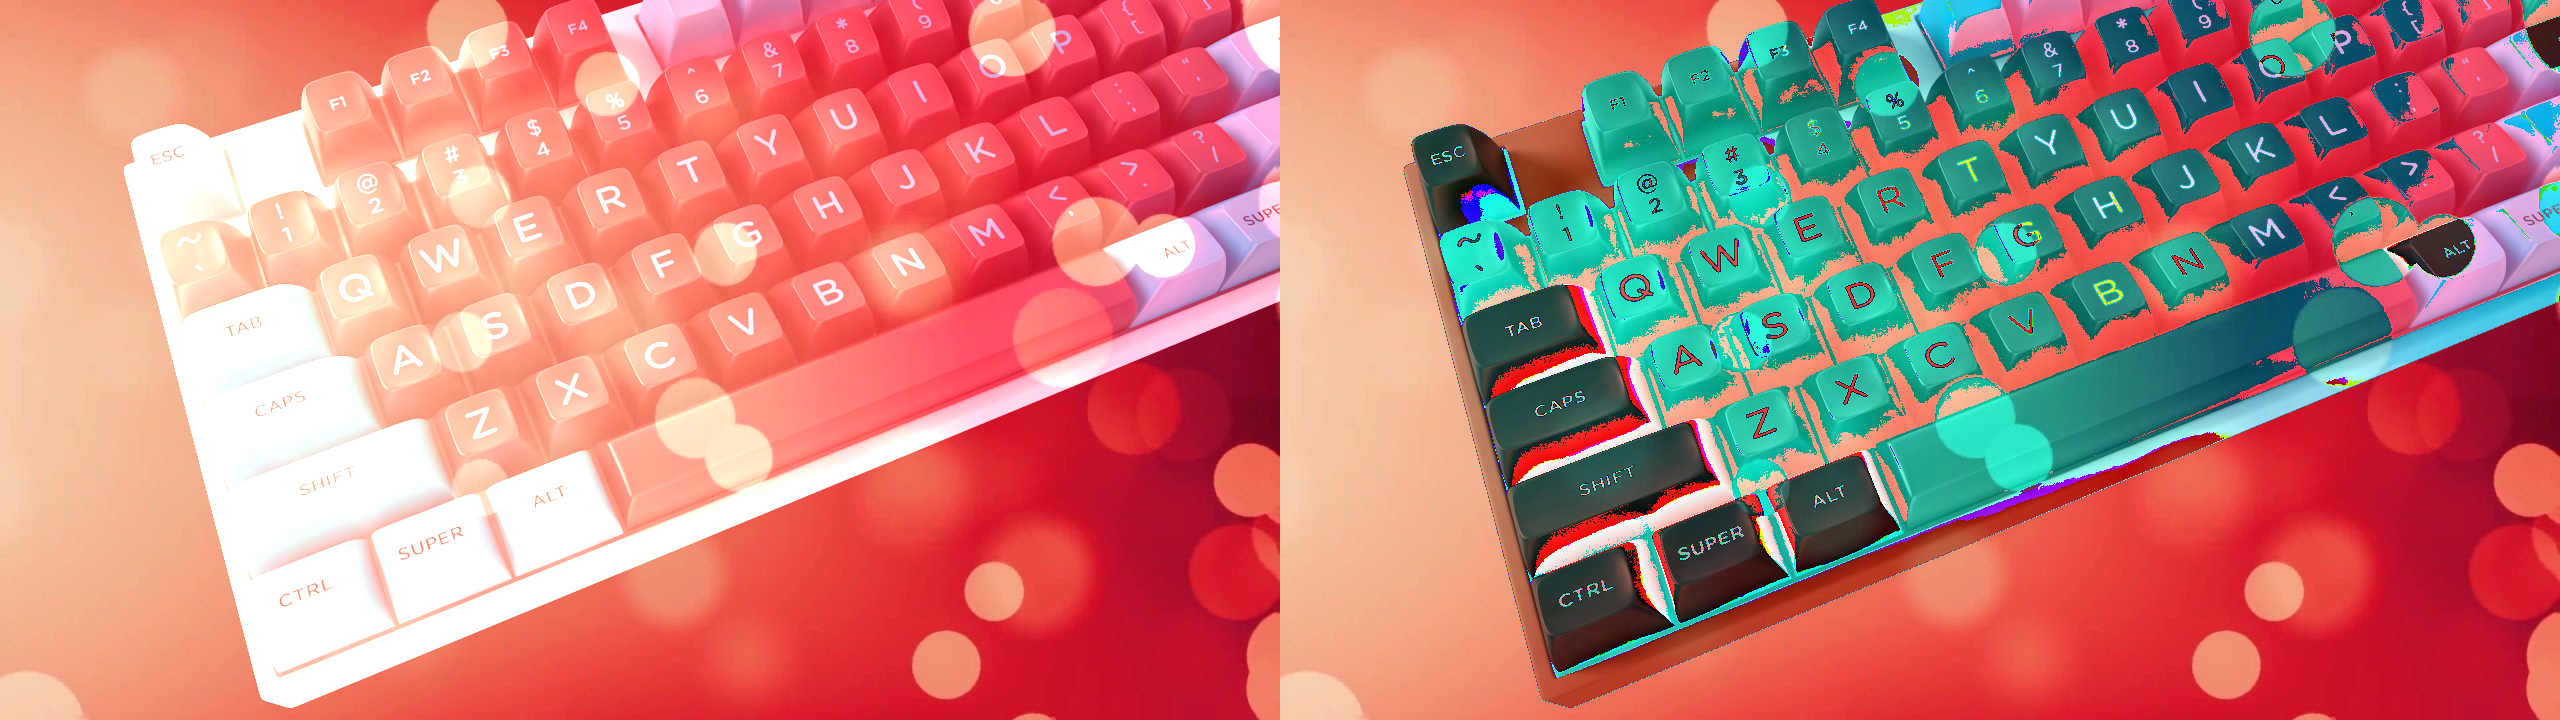

In [59]:
from google.colab.patches import cv2_imshow

# or vconcat for vertical concatenation
final = cv2.hconcat((result, result2))
cv2_imshow(final)

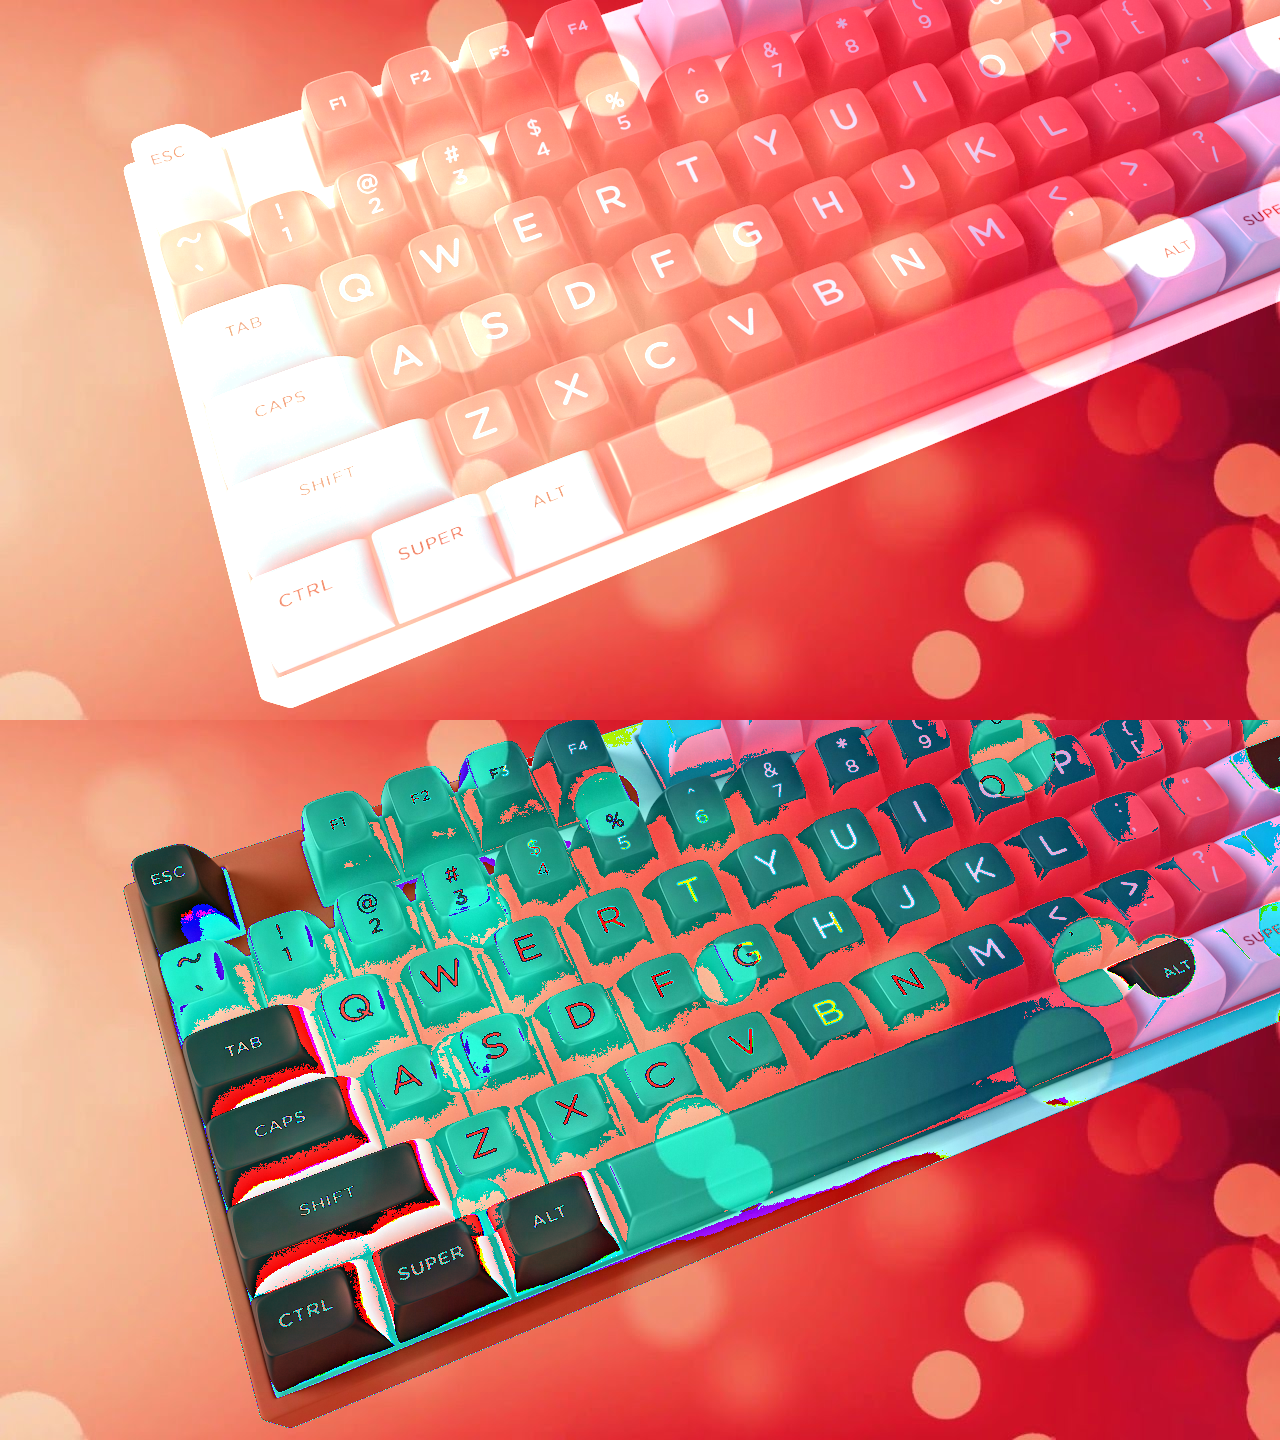

In [58]:
from google.colab.patches import cv2_imshow

# or vconcat for vertical concatenation
final2 = cv2.vconcat((result, result2))
cv2_imshow(final2)